# Import software libraries

In [177]:
# Import required libraries.
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns                                       # Make charting easier.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.model_selection import train_test_split, \
                                    learning_curve, \
                                    cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, \
                            confusion_matrix, \
                            classification_report, \
                            scorer, \
                            f1_score, \
                            recall_score, \
                            precision_score, \
                            roc_auc_score, \
                            plot_roc_curve, \
                            plot_precision_recall_curve, \
                            plot_confusion_matrix
from sklearn.dummy import DummyClassifier
import xgboost                                              # Build gradient boosting models.
from xgboost import XGBClassifier
import pickle                                               # Save Python objects as binary files.
from collections import Counter
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

# Ensure results are reproducible.
np.random.seed(1)

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- XGBoost {}'.format(xgboost.__version__))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.19.2
- pandas 1.1.3
- Matplotlib 3.3.2
- Seaborn 0.11.0
- scikit-learn 0.23.2
- XGBoost 1.3.3


# Read and examine the data

In [178]:
# Read the data.

customer = pd.read_pickle('data/customer_data.pickle')

# Preview the first five rows of the data.

customer.head()

,frequency,recency,tenure,monetary_value,number_unique_items,churned
u12747,6.0,367.0,369.0,39.19,3,True
u12748,41.0,365.0,369.0,12.01,9,False
u12749,2.0,127.0,130.0,22.28,2,True
u1282,0.0,0.0,326.0,0.00,1,False
u12822,0.0,0.0,87.0,0.00,1,True


In [179]:
# Check the structure of the data.

customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2130 entries, u12747 to u18283
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   frequency            2130 non-null   float64
 1   recency              2130 non-null   float64
 2   tenure               2130 non-null   float64
 3   monetary_value       2130 non-null   float64
 4   number_unique_items  2130 non-null   int64  
 5   churned              2130 non-null   bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 101.9+ KB


# Prepare the data

In [180]:
# Define the target variable and get the count of each value in the variable.

customer.churned.value_counts()

False    1380
True      750
Name: churned, dtype: int64

In [181]:
# Split the data into target and features.

target = customer.churned
features = customer.drop(['churned'], axis = 1)

In [182]:
# Split the dataset into separate training and testing sets.

x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size = 0.2)

# Get the shape of both the training dataset and the test dataset.

print('Training data features: ', x_train.shape)
print('Training data target: ', y_train.shape)

Training data features:  (1704, 5)
Training data target:  (1704,)


In [183]:
# Use the Counter library to get the count of each value in the target variable (test data).

print(Counter(y_train))

Counter({False: 1101, True: 603})


# Train a logistic regression model

In [184]:
# Normalize the training data.

sm = SMOTE(random_state=42)

x_train_SMOTE, y_train_SMOTE = sm.fit_resample(X = x_train, y = y_train)
x_train_SMOTE = pd.DataFrame(x_train_SMOTE,
                             columns = x_train.columns)

norm = MinMaxScaler().fit(x_train_SMOTE)
x_train_norm = norm.transform(x_train_SMOTE)

print(x_train.shape)
print(x_train_norm.shape)

(1704, 5)
(2202, 5)


In [185]:
# Create a LogisticRegression() model and fit it on the scaled training data.

logreg = LogisticRegression()
logreg.fit(x_train_norm, y_train_SMOTE)

LogisticRegression()

In [186]:
# Make predictions on the test data.

logreg_y_pred = logreg.predict(x_test)

# Get a count of each prediction value.

print(Counter(logreg_y_pred))

Counter({True: 373, False: 53})


# Perform a quick evaluation of the logistic regression model

In [187]:
# Obtain the accuracy of the model's predictions.

accuracy_score(y_test, logreg_y_pred)

0.40375586854460094

In [188]:
# Use the classification_report() function to get a table of additional metric scores.

print(classification_report(y_test, logreg_y_pred))

              precision    recall  f1-score   support

       False       0.74      0.14      0.23       279
        True       0.36      0.90      0.51       147

    accuracy                           0.40       426
   macro avg       0.55      0.52      0.37       426
weighted avg       0.60      0.40      0.33       426



# Train a random forest model

In [189]:
# Create a RandomForestClassifier() model and fit it on the scaled training data.

rf = RandomForestClassifier()
rf.fit(x_train_SMOTE, y_train_SMOTE)

RandomForestClassifier()

In [190]:
# Make predictions on the test data.

rf_y_pred = rf.predict(x_test)

# Get a count of each prediction value.

print(Counter(rf_y_pred))

Counter({False: 281, True: 145})


# Perform a quick evaluation of the logistic regression model

In [191]:
# Obtain the accuracy of the model's predictions.

accuracy_score(y_test, rf_y_pred)

0.5117370892018779

In [192]:
# Use the classification_report() function to get a table of additional metric scores.

print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

       False       0.63      0.63      0.63       279
        True       0.29      0.29      0.29       147

    accuracy                           0.51       426
   macro avg       0.46      0.46      0.46       426
weighted avg       0.51      0.51      0.51       426



# Compare evaluation metrics for each model

In [193]:
# List will hold model objects.

models = []

# DummyClassifier() used as a baseline algorithm.

models.append(('Dummy Classifier', DummyClassifier(strategy = 'stratified')))

# Logistic Regression model.

models.append(('Logistic Regression', LogisticRegression()))

# Random Forest model.

models.append(('Random Forest', RandomForestClassifier()))

# XGBoost model.

models.append(('XGBoost', XGBClassifier(eval_metric = 'logloss', n_jobs = 1)))

In [194]:
# List will hold dictionaries of model scores.

scoring_df = []

# Train each model in the list and output multiple scores for each model.

for name, model in models:
    if name in ['Logistic Regression']:
        x_train_1 = x_train
    else:
        x_train_1 = x_train
    
    model.fit(x_train_1, y_train)
    
    y_pred = model.predict(x_test)

    # Calcualte the evaluation metrics for the model.
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    scoring_dict = {'Model': name,
                    'Accuracy': round(accuracy, 4), 
                    'F1 Score': round(f1, 4), 
                    'Precision' : round(precision, 4), 
                    'Recall' : round(recall, 4), 
                    'AUC' : round(auc ,4), 
                   }
    
    scoring_df.append(scoring_dict)

In [195]:
# Create a DataFrame from scoring_df.

scoring_df = pd.DataFrame(scoring_df)

# Sort the DataFrame by accuracy score (descending), then print it.

scoring_df.sort_values(by=['Accuracy'], ascending = False)

,Model,Accuracy,F1 Score,Precision,Recall,AUC
1,Logistic Regression,0.6549,0.0000,0.0000,0.0000,0.5000
3,XGBoost,0.5657,0.2688,0.3208,0.2313,0.4866
2,Random Forest,0.5563,0.2286,0.2857,0.1905,0.4698
0,Dummy Classifier,0.4859,0.2526,0.2534,0.2517,0.4305


# Begin evaluating the best model

In [196]:
# Retrain the model with the highest accuracy score.

logreg.fit(x_train_norm, y_train_SMOTE)

LogisticRegression()

In [197]:
# Make predictions on the test data.

logreg_y_pred = logreg.predict(x_test)

# Get a count of each prediction value.

Counter(logreg_y_pred)

Counter({True: 373, False: 53})

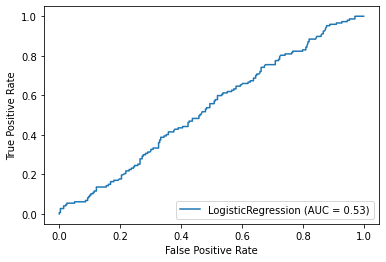

In [198]:
# Plot a ROC curve.

plot_roc_curve(logreg, x_test, y_test);

# Generate a confusion matrix of the best model

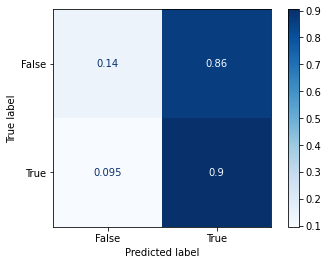

In [199]:
# Generate a confusion matrix.

plot_confusion_matrix(logreg,
                     x_test,
                     y_test,
                     cmap = plt.cm.Blues,
                     normalize = 'true');

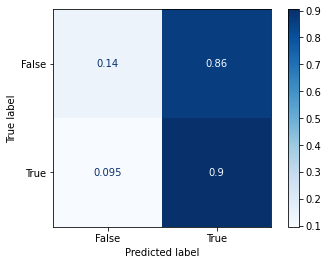

In [200]:
# Plot the confusion matrix.

plot_confusion_matrix(logreg,
                     x_test,
                     y_test,
                     cmap = plt.cm.Blues,
                     normalize = 'true');

# Generate a feature importance plot for the best model

In [201]:
# This function generates a feature importance plot on a bar chart.

def feature_importance_plot(model, X_train, n):
    """Plots feature importance. This only works for random forest and XGBoost models."""
    
    plt.figure(figsize=(8, 5))  # Set figure size.
    feat_importances = pd.Series(model.coef_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'barh')
    plt.title(f'Top {n} Features')
    plt.show()

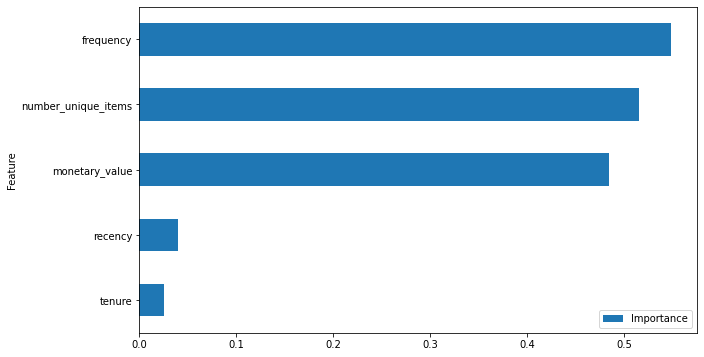

In [202]:
# Plot the feature importances.

coefficients = logreg.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6));

# Plot a learning curve for the best model

In [203]:
# This function generates and plots a learning curve.

def plot_learning_curves(model, X_train, y_train):
    """Plots learning curves for model validation."""
    
    plt.figure(figsize=(5, 5))  # Set figure size.
    train_sizes, train_scores, test_scores = learning_curve(model,
                                                            X_train,
                                                            y_train,
                                                            cv = 5,  # Number of folds in cross-validation.
                                                            scoring = 'accuracy',  # Evaluation metric.
                                                            n_jobs = 1,
                                                            shuffle = True,
                                                            train_sizes = np.linspace(0.01, 1.0, 5))  # 5 different sizes of the training set.

    # Create means and standard deviations of training set scores.
    
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores.
    
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines.
    
    plt.plot(train_sizes, train_mean, '--', color = '#111111', label = 'Training score')
    plt.plot(train_sizes, test_mean, color = '#111111', label = 'Cross-validation score')
    
    # Create plot.
    
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size'), plt.ylabel('Accuracy'), plt.legend(loc = 'best')
    plt.tight_layout()
    
    plt.show()

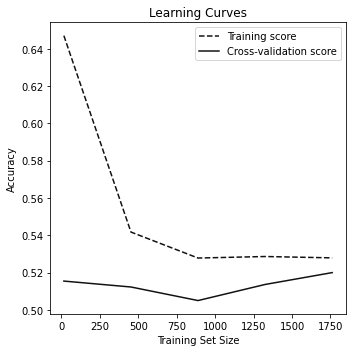

In [204]:
# Call the function to plot learning curves for the best model.

plot_learning_curves(logreg, x_train_norm, y_train_SMOTE)

# Save the best model

In [205]:
# Save the best model as a pickle file named best_classification_model.pickle.

pickle.dump(logreg, open('best_classification_model.pickle', 'wb'))